In [6]:
from sympy import *
from dynpy.solvers.linear import ODESystem

from sympy.physics.mechanics import dynamicsymbols, init_vprinting

init_vprinting()
from sympy import S

from dynpy.utilities.report import *
from dynpy.utilities.adaptable import *

from pylatex import Section, Document

from dynpy.utilities.components.mech import en,pl
from dynpy.models.mechanics.pendulum import KinematicallyExcitedIvertedPendulum
from dynpy.utilities.components.mech.en import *
from dynpy import dynamics
from math import sqrt

In [7]:
m=Symbol('m', positive=True)
m_0=Symbol('m_0', positive=True)
g=Symbol('g', positive=True)
l=Symbol('l' , positive=True)
l_0=Symbol('l_0', positive=True)
t=Symbol('t')
phi=Function('varphi')(t)
x_0=Symbol('x_0', positive=True)
x_e=Symbol('x_e', positive=True)
omega=Symbol('\Omega', positive=True)
omega_1=Symbol('\Omega', positive=True)


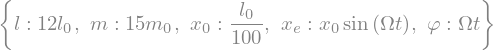

In [8]:
data={m:15*m_0, phi:omega*t, l:12*l_0, x_e:x_0*sin(omega*t), x_0:l_0/100}
display(data)

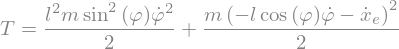

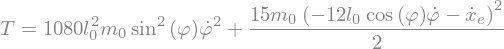

In [9]:
T=KinematicallyExcitedIvertedPendulum()._kinetic_energy
display(Eq(Symbol('T'),T))
display(Eq(Symbol('T'),T.subs(data)))

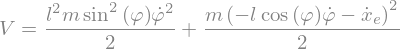

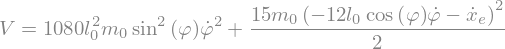

In [10]:
V=KinematicallyExcitedIvertedPendulum()._kinetic_energy
display(Eq(Symbol('V'),V))
display(Eq(Symbol('V'),V.subs(data)))

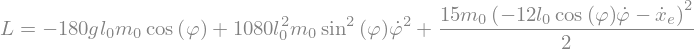

In [11]:
L=KinematicallyExcitedIvertedPendulum().L
display(Eq(Symbol('L'),L.subs(data)[0]))

In [12]:
eom=Eq(diff(diff(T,diff(phi)),t)-diff(T,phi)+diff(V,phi),0)
eom_simplified=eom.expand().simplify().doit().expand()
eom_simplified

###
eoms=KinematicallyExcitedIvertedPendulum()._eoms.subs(data)
eoms_unsub=KinematicallyExcitedIvertedPendulum()._eoms
display(ReportText('Equations of motion of the system:'))
display(Eq(Matrix([0]), eoms.expand().n()))

Equations of motion of the system:

In [13]:
static={phi.diff():0, phi.diff(t,2):0, x_e.diff():0, x_e.diff(t,2):0}

In [14]:
static_eq=eom_simplified.subs(static)
static_eq

In [15]:
crit_points=solve(static_eq, phi)
display(crit_points)

In [16]:
linearize_zero={sin(phi): phi, cos(phi):1}

In [17]:
sub={x_e: x_0*sin(omega*t)}

In [18]:
display(eom_simplified.subs(linearize_zero))
eom_linearized_zero=eom_simplified.subs(linearize_zero).subs(sub).subs(omega, 0).doit()
display(eom_linearized_zero)
dsolve(eom_linearized_zero)

ValueError: The function cannot be automatically detected for True.

In [0]:
omega_1 = sqrt((m*g*l)/(m*l**2))
display(omega_1)
